In [16]:
!pip install tensorflow

In [18]:
!pip install matplotlib

In [19]:
!pip install sklearn

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [21]:
#Keras Libraries
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
read_folder = r'C:\nataly\EX1 - deep learning\chest_xray'

train_read_folder = os.path.join(read_folder, 'train')
test_read_folder = os.path.join(read_folder, 'test')
val_read_folder = os.path.join(read_folder, 'val')
train_PNEUMONIA_read_folder = os.path.join(train_read_folder, 'PNEUMONIA')
train_NORMAL_read_folder = os.path.join(train_read_folder, 'NORMAL')
test_PNEUMONIA_read_folder = os.path.join(test_read_folder, 'PNEUMONIA')
test_NORMAL_read_folder = os.path.join(test_read_folder, 'NORMAL')

# Extracting all file names

train_PNEUMONIA_files = os.listdir(train_PNEUMONIA_read_folder)
train_NORMAL_files = os.listdir(train_NORMAL_read_folder)
test_PNEUMONIA_files = os.listdir(test_PNEUMONIA_read_folder)
test_NORMAL_files = os.listdir(test_NORMAL_read_folder)

print ( "Accout train normal is:" , len(train_NORMAL_files), "and Accout train PNEUMONIA is", len(train_PNEUMONIA_files))
print ("Accout test normal is : " ,len(test_NORMAL_files), "and Accout test PNEUMONIA is" , len(test_PNEUMONIA_files))
print("Total images in the training set: ", len(train_PNEUMONIA_files+train_NORMAL_files))
print("Total images in the test set: ", len(test_PNEUMONIA_files+test_NORMAL_files))


Accout train normal is: 1341 and Accout train PNEUMONIA is 3875
Accout test normal is :  234 and Accout test PNEUMONIA is 390
Total images in the training set:  5216
Total images in the test set:  624


#SECTION A

In [24]:
BATCH_SIZE=45
train_normalization = ImageDataGenerator(rescale=1./255)
test_normalization = ImageDataGenerator(rescale=1./255)
val_normalization = ImageDataGenerator(rescale=1./255)

train_directory=train_read_folder
test_directory=test_read_folder
val_directory=val_read_folder

train_data=train_normalization.flow_from_directory(train_directory, target_size=(224,224),class_mode='binary', batch_size= BATCH_SIZE, color_mode='grayscale')
test_data=test_normalization.flow_from_directory(test_directory, target_size=(224,224),class_mode='binary',batch_size= BATCH_SIZE, color_mode='grayscale')
val_data=val_normalization.flow_from_directory(val_directory, target_size=(224,224),class_mode='binary', batch_size= 2, color_mode='grayscale')

print('test data BATCH SIZE is',len(test_data))
print('shape is : ',test_data.image_shape)
print('train data BATCH SIZE is:' ,len(train_data))
print("the kind of classes is: ",train_data.class_indices)
print("the number of classes is: ",train_data.num_classes)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
test data BATCH SIZE is 14
shape is :  (224, 224, 1)
train data BATCH SIZE is: 116
the kind of classes is:  {'NORMAL': 0, 'PNEUMONIA': 1}
the number of classes is:  2


In [25]:
model = keras.Sequential(name="my_sequential_Dnn")
model.add(layers.Flatten(input_shape=(224,224,1)))
model.add(layers.Dense(128, activation='relu', name='Dense1'))
model.add(layers.Dense(128, activation='relu', name='Dense2'))
model.add(layers.Dense(64, activation='relu', name='Dense3'))
model.add(layers.Dense(32, activation='relu', name='Dense4'))
model.add(layers.Dense(1, activation='sigmoid', name='Dense5'))
model.summary()

Model: "my_sequential_Dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 Dense1 (Dense)              (None, 128)               6422656   
                                                                 
 Dense2 (Dense)              (None, 128)               16512     
                                                                 
 Dense3 (Dense)              (None, 64)                8256      
                                                                 
 Dense4 (Dense)              (None, 32)                2080      
                                                                 
 Dense5 (Dense)              (None, 1)                 33        
                                                                 
Total params: 6,449,537
Trainable params: 6,449,5

In [26]:
model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=5e-5), metrics=['accuracy'])

Section number B

In [27]:
epochs=50
model_fit = model.fit(train_data,validation_data=val_data, epochs=epochs, batch_size=BATCH_SIZE )

Epoch 1/50
116/116 [==============================] - 123s 1s/step - loss: 0.3053 - accuracy: 0.8669 - val_loss: 0.4705 - val_accuracy: 0.8125
Epoch 2/50
116/116 [==============================] - 103s 886ms/step - loss: 0.1677 - accuracy: 0.9358 - val_loss: 0.2999 - val_accuracy: 0.8750
Epoch 3/50
116/116 [==============================] - 83s 717ms/step - loss: 0.1352 - accuracy: 0.9490 - val_loss: 0.2075 - val_accuracy: 0.9375
Epoch 4/50
116/116 [==============================] - 85s 734ms/step - loss: 0.1310 - accuracy: 0.9492 - val_loss: 0.2696 - val_accuracy: 0.9375
Epoch 5/50
116/116 [==============================] - 88s 760ms/step - loss: 0.1227 - accuracy: 0.9505 - val_loss: 0.6040 - val_accuracy: 0.6875
Epoch 6/50
116/116 [==============================] - 89s 766ms/step - loss: 0.1277 - accuracy: 0.9503 - val_loss: 0.3949 - val_accuracy: 0.8125
Epoch 7/50
116/116 [==============================] - 92s 787ms/step - loss: 0.1227 - accuracy: 0.9532 - val_loss: 0.6160 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


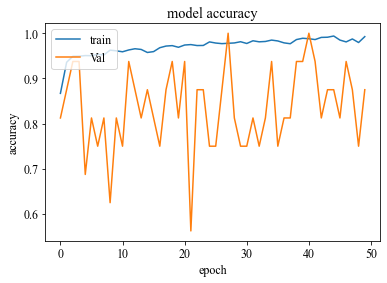

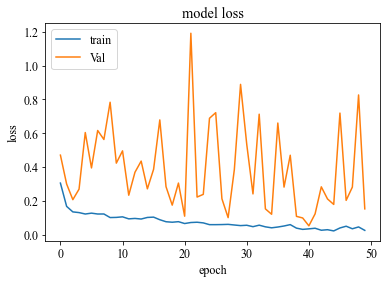

In [28]:
print(model_fit.history.keys())
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

SECTION NUMBER C

In [29]:
predictions_DNN = model.predict(test_data) 
y_pred_Adam = predictions_DNN > 0.4
y_true_Adam = test_data.classes

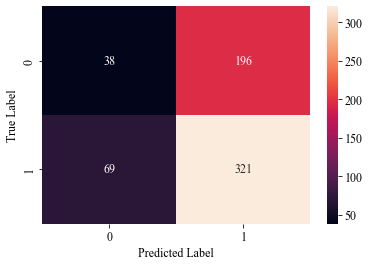

In [30]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true_Adam, y_pred_Adam)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()


In [31]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true_Adam, y_pred_Adam, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true_Adam, y_pred_Adam, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.823076923076923
The precision of the model is: 0.620889748549323


SECTION NUMBER D

In [32]:
# defining a convolution model 
tf.keras.backend.clear_session()

In [33]:
num_classes = 1
input_shape = (224, 224, 1)
epochs = 50

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu" ,padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dropout (Dropout)           (None, 200704)            0

In [34]:
model2.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=5e-6), metrics=['accuracy'])

history_CNN = model2.fit(train_data,validation_data = val_data, epochs = epochs ,batch_size = BATCH_SIZE)

Epoch 1/50
116/116 [==============================] - 743s 6s/step - loss: 0.5801 - accuracy: 0.7421 - val_loss: 0.8338 - val_accuracy: 0.5000
Epoch 2/50
116/116 [==============================] - 762s 7s/step - loss: 0.5493 - accuracy: 0.7429 - val_loss: 0.7823 - val_accuracy: 0.5000
Epoch 3/50
116/116 [==============================] - 701s 6s/step - loss: 0.5237 - accuracy: 0.7429 - val_loss: 0.7627 - val_accuracy: 0.5000
Epoch 4/50
116/116 [==============================] - 589s 5s/step - loss: 0.4925 - accuracy: 0.7429 - val_loss: 0.7372 - val_accuracy: 0.5000
Epoch 5/50
116/116 [==============================] - 601s 5s/step - loss: 0.4597 - accuracy: 0.7465 - val_loss: 0.7126 - val_accuracy: 0.5625
Epoch 6/50
116/116 [==============================] - 715s 6s/step - loss: 0.4254 - accuracy: 0.7765 - val_loss: 0.6701 - val_accuracy: 0.5625
Epoch 7/50
116/116 [==============================] - 1968s 17s/step - loss: 0.3930 - accuracy: 0.8230 - val_loss: 0.6543 - val_accuracy: 0.62

SECTION NUMBER D - SECTION B

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


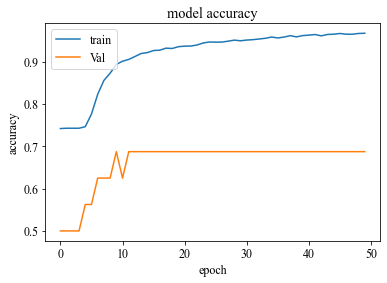

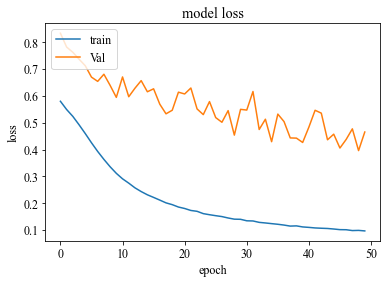

In [35]:
print(history_CNN.history.keys())
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()


# summarize history for loss

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

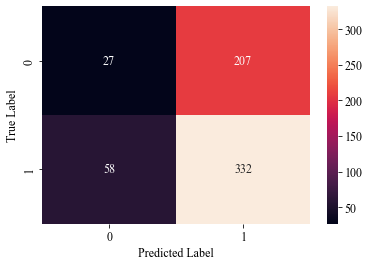

In [36]:
predictions_CNN = model2.predict(test_data) 
y_pred = predictions_CNN > 0.4
y_true = test_data.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [37]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.8512820512820513
The precision of the model is: 0.6159554730983302


SECTION NUMBER E

In [38]:
tf.keras.backend.clear_session()

In [39]:
num_classes = 1
input_shape = (224, 224, 1)
epochs = 25

model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu" ,padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [40]:
model3.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=5e-4), metrics=['accuracy'])

history_CNN = model3.fit(train_data,validation_data = val_data, epochs = epochs ,batch_size = BATCH_SIZE)

Epoch 1/25
116/116 [==============================] - 712s 6s/step - loss: 0.2764 - accuracy: 0.8754 - val_loss: 0.6415 - val_accuracy: 0.6875
Epoch 2/25
116/116 [==============================] - 678s 6s/step - loss: 0.0906 - accuracy: 0.9657 - val_loss: 0.3195 - val_accuracy: 0.8125
Epoch 3/25
116/116 [==============================] - 620s 5s/step - loss: 0.0886 - accuracy: 0.9666 - val_loss: 0.1788 - val_accuracy: 0.9375
Epoch 4/25
116/116 [==============================] - 577s 5s/step - loss: 0.0662 - accuracy: 0.9737 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 5/25
116/116 [==============================] - 684s 6s/step - loss: 0.0592 - accuracy: 0.9783 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 6/25
116/116 [==============================] - 641s 6s/step - loss: 0.0492 - accuracy: 0.9826 - val_loss: 0.1826 - val_accuracy: 0.9375
Epoch 7/25
116/116 [==============================] - 554s 5s/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.2516 - val_accuracy: 0.8125

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


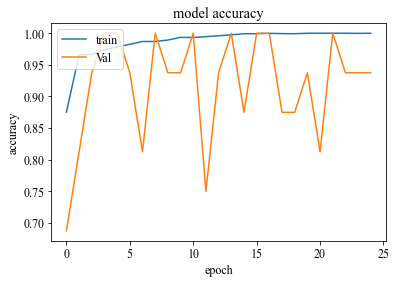

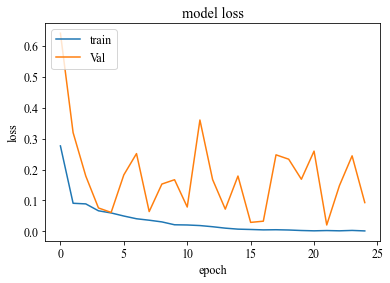

In [42]:
print(history_CNN.history.keys())
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()


# summarize history for loss

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

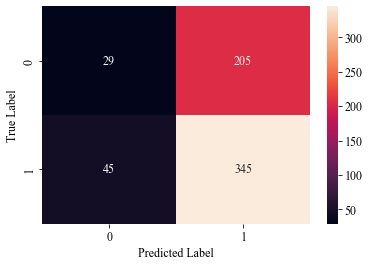

In [41]:
predictions_CNN = model3.predict(test_data) 
y_pred = predictions_CNN > 0.4
y_true = test_data.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [43]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.8846153846153846
The precision of the model is: 0.6272727272727273


SECTION NUMBER F

In [44]:
Img_Size = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(Img_Size, Img_Size),
  layers.Rescaling(1./255)
])

In [46]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.4),
  ]
)

In [47]:
num_classes = 2
epochs = 20

model4 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])



model4.compile(optimizer = Adam(learning_rate=1e-6),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model4_fit=model4.fit(train_data,validation_data = val_data, epochs=epochs, batch_size=BATCH_SIZE)  

Epoch 1/20
116/116 [==============================] - 503s 4s/step - loss: 0.7673 - accuracy: 0.3014 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/20
116/116 [==============================] - 484s 4s/step - loss: 0.6440 - accuracy: 0.7155 - val_loss: 0.7289 - val_accuracy: 0.5000
Epoch 3/20
116/116 [==============================] - 514s 4s/step - loss: 0.6012 - accuracy: 0.7429 - val_loss: 0.7728 - val_accuracy: 0.5000
Epoch 4/20
116/116 [==============================] - 493s 4s/step - loss: 0.5921 - accuracy: 0.7429 - val_loss: 0.7992 - val_accuracy: 0.5000
Epoch 5/20
116/116 [==============================] - 540s 5s/step - loss: 0.5884 - accuracy: 0.7429 - val_loss: 0.8079 - val_accuracy: 0.5000
Epoch 6/20
116/116 [==============================] - 544s 5s/step - loss: 0.5869 - accuracy: 0.7429 - val_loss: 0.8098 - val_accuracy: 0.5000
Epoch 7/20
116/116 [==============================] - 523s 4s/step - loss: 0.5858 - accuracy: 0.7429 - val_loss: 0.8076 - val_accuracy: 0.5000

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


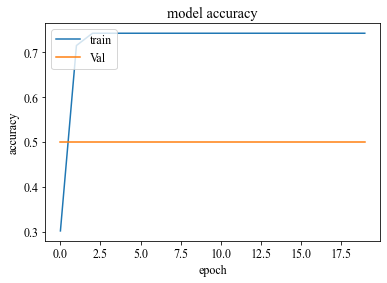

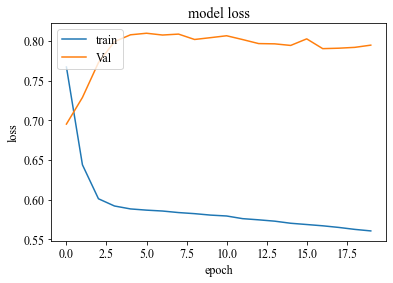

In [48]:
print(model4_fit.history.keys())
plt.plot(model4_fit.history['accuracy'])
plt.plot(model4_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(model4_fit.history['loss'])
plt.plot(model4_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()